In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,f1_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import shap
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
columns = pd.DataFrame({"":'', "Columns": df.columns})
columns.set_index("",inplace=True)
columns

,Columns
,
,Age
,Attrition
,BusinessTravel
,DailyRate
,Department
,DistanceFromHome
,Education
,EducationField
,EmployeeCount


In [4]:
info = pd.DataFrame({
    "Column Name": df.columns,
    "Non-Null Count": df.count().values,  
    "Data Type": df.dtypes.values
})
info

,Column Name,Non-Null Count,Data Type
0,Age,1470,int64
1,Attrition,1470,object
2,BusinessTravel,1470,object
3,DailyRate,1470,int64
4,Department,1470,object
5,DistanceFromHome,1470,int64
6,Education,1470,int64
7,EducationField,1470,object
8,EmployeeCount,1470,int64
9,EmployeeNumber,1470,int64


In [5]:
df = df.drop(columns = 'EmployeeCount')

In [6]:
df = df.drop(columns = 'Over18')

In [7]:
df = df.drop(columns = 'StandardHours')

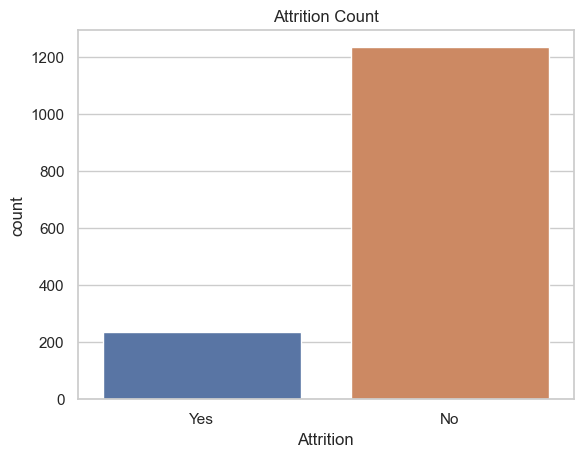

In [8]:
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()

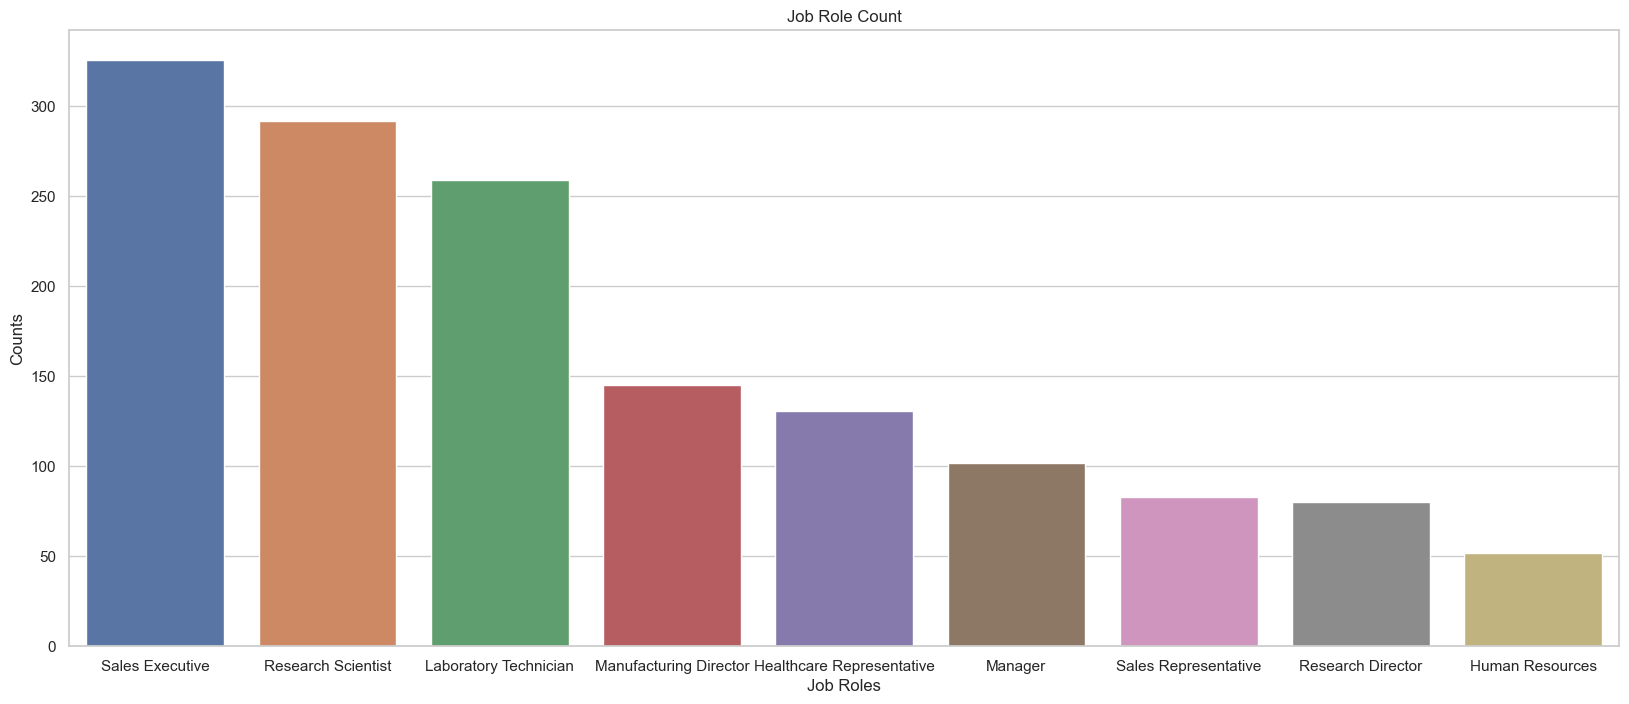

In [9]:
plt.figure(figsize=(20,8))
sns.countplot(x='JobRole', data=df)
plt.xlabel('Job Roles')
plt.ylabel('Counts')
plt.title('Job Role Count')
plt.show()

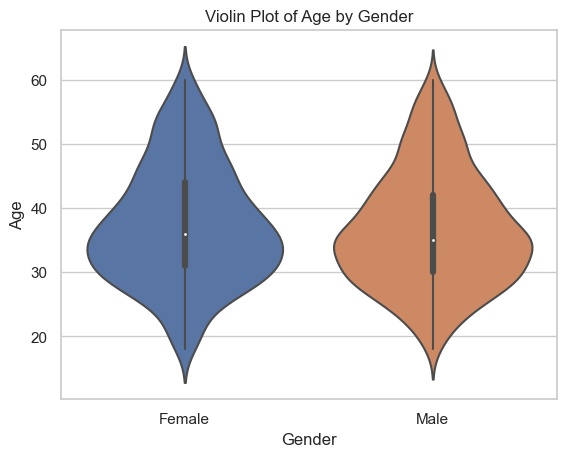

In [10]:
sns.violinplot(x="Gender", y="Age", data=df)
plt.title("Violin Plot of Age by Gender")
plt.show()

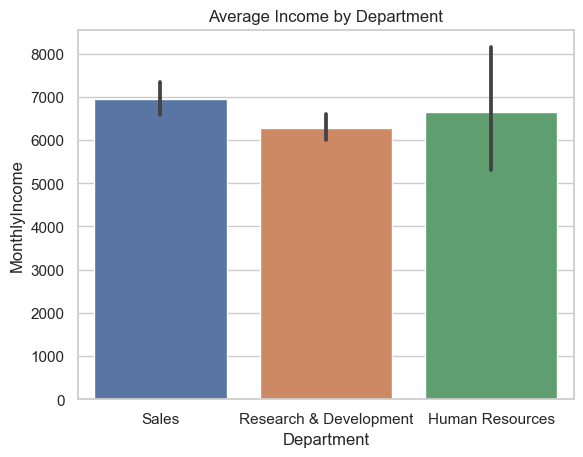

In [11]:
sns.barplot(x="Department", y="MonthlyIncome", data=df)
plt.title("Average Income by Department")
plt.show()

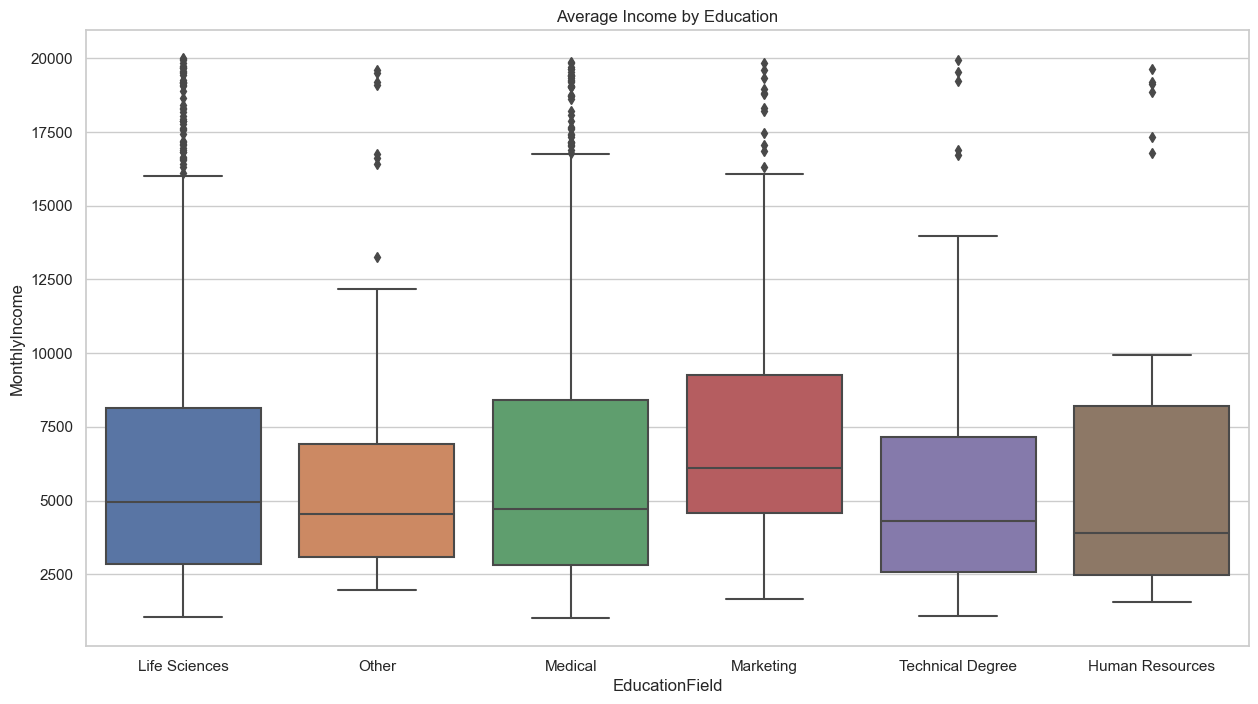

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='EducationField',y='MonthlyIncome')
plt.title("Average Income by Education")
plt.show()

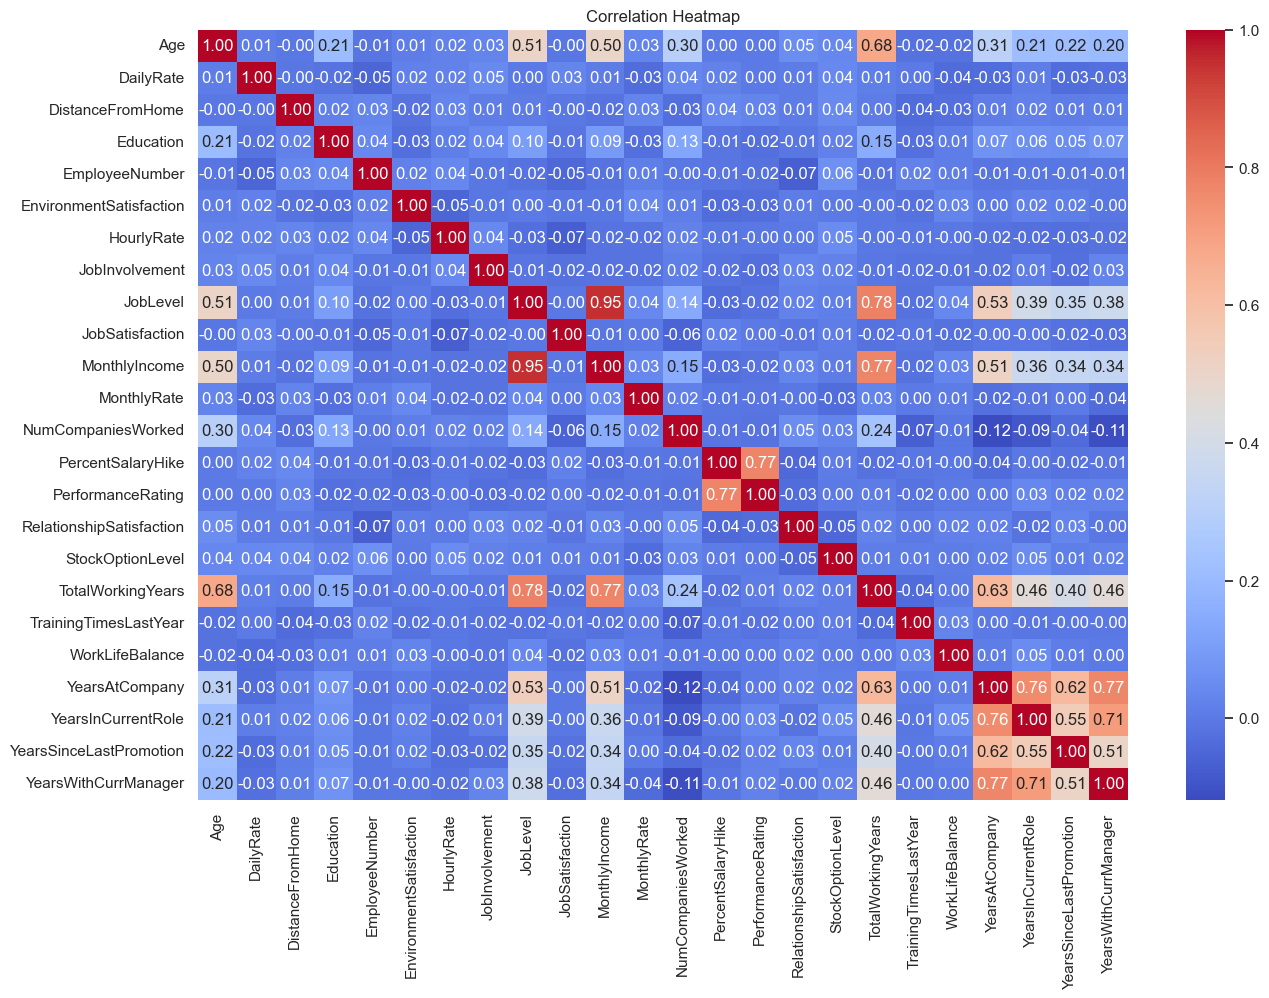

In [13]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

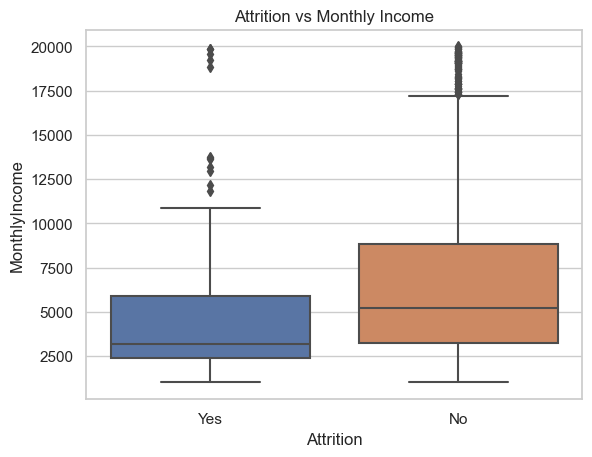

In [14]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Attrition vs Monthly Income')
plt.show()



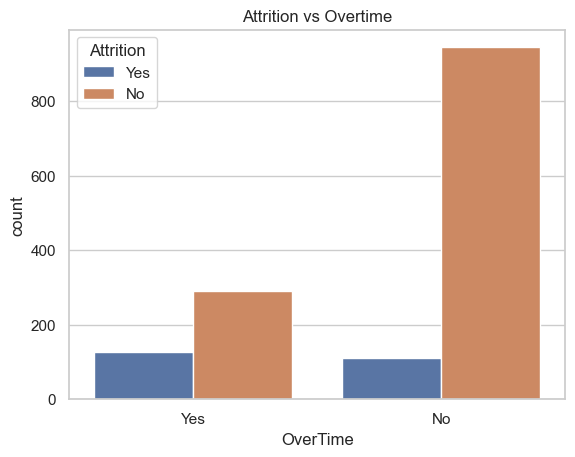

In [15]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition vs Overtime')
plt.show()

In [16]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [17]:
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [18]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [19]:
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

<span style="font-size:20px">Encoded categorical features with Label Encoding</span>

In [20]:
encoder = LabelEncoder()
for col in df.select_dtypes(include = ['object']).columns:
    if col !='Attrition':
        df[col] = encoder.fit_transform(df[col])

In [21]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [22]:
df['Attrition'] = df['Attrition'].map({'No':1,'Yes':0})

In [23]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,0,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,1,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


In [24]:
info = pd.DataFrame({
    "Column Name": df.columns,
    "Non-Null Count": df.count().values,  
    "Data Type": df.dtypes.values
})
info

,Column Name,Non-Null Count,Data Type
0,Age,1470,int64
1,Attrition,1470,int64
2,BusinessTravel,1470,int32
3,DailyRate,1470,int64
4,Department,1470,int32
5,DistanceFromHome,1470,int64
6,Education,1470,int64
7,EducationField,1470,int32
8,EmployeeNumber,1470,int64
9,EnvironmentSatisfaction,1470,int64


In [25]:
BusinessTravel = pd.DataFrame({"":'','Count':df['BusinessTravel'].unique(),'BusinessTravel':df['BusinessTravel'].value_counts()})
BusinessTravel.set_index("",inplace=True)
BusinessTravel


,Count,BusinessTravel
,,
,2,1043
,1,277
,0,150



<span style="font-size:20px">2-----> Travel_Rarely</span>

<span style="font-size:20px">1-----> Travel_Frequently</span>

<span style="font-size:20px">0-----> Non_Travel</span>


In [26]:

MaritalStatus = pd.DataFrame({"":'','Count':df['MaritalStatus'].unique(),'MaritalStatus':df['MaritalStatus'].value_counts()})
MaritalStatus.set_index("",inplace=True)
MaritalStatus

,Count,MaritalStatus
,,
,2,673
,1,470
,0,327




<span style="font-size:20px">2-----> Married</span>

<span style="font-size:20px">1-----> Single</span>

<span style="font-size:20px">0-----> Divorced</span>


In [27]:
Department = pd.DataFrame({"":'','Count':df['Department'].unique(),'Department':df['Department'].value_counts()})
Department.set_index("",inplace=True)
Department


,Count,Department
,,
,2,961
,1,446
,0,63




<span style="font-size:20px">2-----> Research & Development</span>

<span style="font-size:20px">1-----> Sales</span>

<span style="font-size:20px">0-----> Human Resources</span>



In [28]:
EducationField = pd.DataFrame({"":'','Count':df['EducationField'].unique(),'EducationField':df['EducationField'].value_counts()})
EducationField.set_index("",inplace = True)
EducationField

,Count,EducationField
,,
,1,606
,4,464
,3,159
,2,132
,5,82
,0,27


<span style="font-size:20px">1-----> Life Sciences</span>

<span style="font-size:20px">4-----> Medical</span>

<span style="font-size:20px">3-----> Marketing</span>

<span style="font-size:20px">2-----> Technical Degree</span>

<span style="font-size:20px">5-----> Other</span>

<span style="font-size:20px">0-----> Human Resources</span>

In [29]:
JobRole = pd.DataFrame({"":'','Count':df['JobRole'].unique(),'JobRole':df['JobRole'].value_counts()})
JobRole.set_index("",inplace = True)
JobRole

,Count,JobRole
,,
,7,326
,6,292
,2,259
,4,145
,0,131
,3,102
,8,83
,5,80
,1,52


<span style="font-size:20px">7-----> Sales Executive</span>

<span style="font-size:20px">6-----> Research Scientist</span>

<span style="font-size:20px">2-----> Laboratory Technician</span>

<span style="font-size:20px">4-----> Manufacturing Director</span>

<span style="font-size:20px">0-----> Healthcare Representative</span>

<span style="font-size:20px">3-----> Manager</span>

<span style="font-size:20px">8-----> Sales Representative</span>

<span style="font-size:20px">5-----> Research Director</span>

<span style="font-size:20px">1-----> Human Resources</span>

In [30]:
df['Attrition'].value_counts()
Attrition = pd.DataFrame({"":'','Count':df['Attrition'].unique(),'Attrition':df['Attrition'].value_counts()})
Attrition.set_index("",inplace = True)
Attrition


,Count,Attrition
,,
,0,1233
,1,237


<span style="font-size:20px">0-----> Stayed in company</span>

<span style="font-size:20px">1-----> left the company</span>

In [31]:
stayed = df[df['Attrition']== 1] # stayed in company
left = df[df['Attrition']== 0] # left the company



In [32]:
stayed.shape

(1233, 32)

In [33]:
stayed['Attrition'].count()

1233

In [34]:
left.shape

(237, 32)

In [35]:
left['Attrition'].count()

237

In [36]:
stayed_sample = stayed.sample(n=237)
stayed_sample.shape

(237, 32)

In [37]:
concat_df = pd.concat([stayed_sample,left],axis=0)
concat_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1114,48,1,2,1108,1,15,4,4,1576,3,...,3,4,1,10,3,2,8,2,7,6
759,45,1,2,788,0,24,4,3,1049,2,...,3,1,0,6,3,3,6,3,0,4
515,35,1,0,727,1,3,3,1,704,3,...,3,3,2,1,3,3,1,0,0,0
1054,49,1,2,1490,1,7,4,1,1484,3,...,3,2,2,29,3,3,8,7,0,7
707,47,1,1,1379,1,16,4,3,987,3,...,3,3,0,20,3,4,19,10,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,0,1,638,2,9,3,2,2023,4,...,3,1,1,1,3,2,1,0,1,0
1442,29,0,2,1092,1,1,4,3,2027,1,...,3,2,3,4,3,4,2,2,2,2
1444,56,0,2,310,1,7,2,5,2032,4,...,3,4,1,14,4,1,10,9,9,8
1452,50,0,1,878,2,1,4,1,2044,2,...,3,4,2,12,3,3,6,3,0,1


<span style="font-size:20px">Spliting the data</span>

In [38]:
X = concat_df.drop(columns = 'Attrition' , axis = 1)
Y = concat_df['Attrition']

<span style="font-size:20px">Scaling the features</span>

In [39]:
scaler = StandardScaler()
X_scaling = scaler.fit_transform(X)

<span style="font-size:20px">Training the model</span>

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaling,Y,test_size = 0.2,stratify=Y,random_state = 2)
X_train_scaled = scaler.fit_transform(X_train)     
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled,Y_train)

LogisticRegression()

In [41]:
X_pred = model.predict(X_train_scaled)

In [42]:
X_pred 

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,

In [43]:
Y_pred = model.predict(X_test_scaled)

In [44]:
Y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0], dtype=int64)

<span style="font-size:20px">Checking the accuracy of training data</span>

In [45]:
train_accuracy = accuracy_score(X_pred,Y_train)
train_accuracy

0.7783641160949868

<span style="font-size:20px">Checking the accuracy of test data</span>

In [46]:
test_accuracy = accuracy_score(Y_pred,Y_test)
test_accuracy

0.7789473684210526

In [47]:
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Precision
precision = precision_score(Y_test, Y_pred)

# F1 Score
f1 = f1_score(Y_test, Y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "F1 Score"],
    "Value": [accuracy, precision, f1,]
})

metrics_df["Value"] = metrics_df["Value"].round(4)
metrics_df

,Metric,Value
0,Accuracy,0.7789
1,Precision,0.7600
2,F1 Score,0.7835


In [48]:
conf_matrix

array([[36, 12],
       [ 9, 38]], dtype=int64)

<span style="font-size:20px">Use SHAP to explain LogesticRegression  model</span>

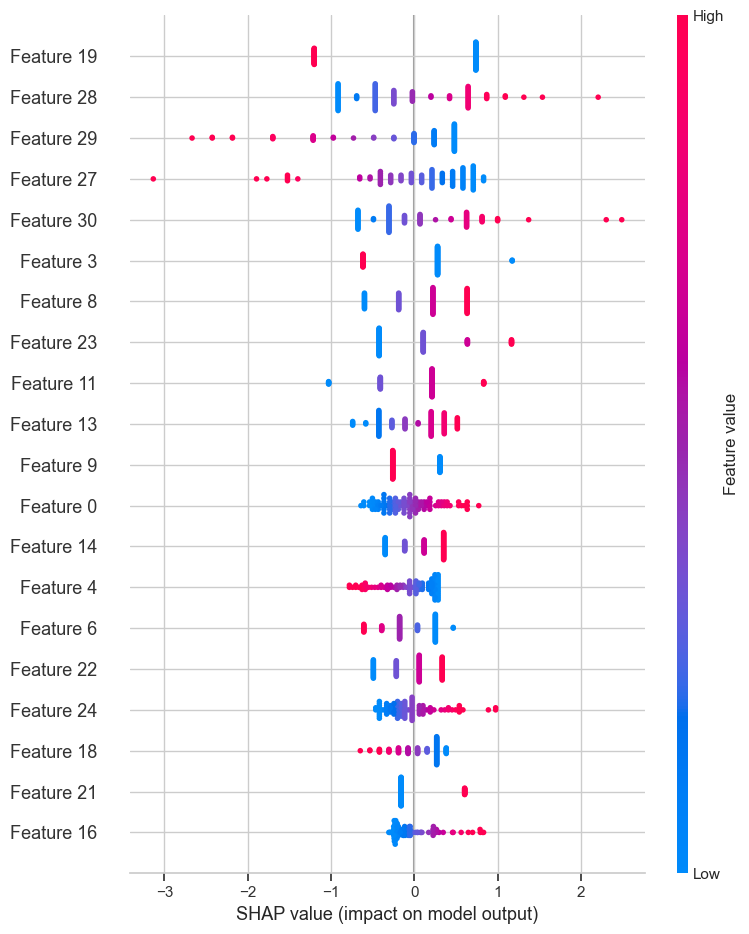

In [49]:
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)


# Summary plot (which features are most important)
shap.summary_plot(shap_values, X_test)

# Explain one employee's prediction
shap.initjs()
 
shap.force_plot(explainer.expected_value, shap_values[0], X_test[0])



# Steps Performed:


>Loaded and explored the HR employee attrition dataset.

>Cleaned the dataset by removing irrelevant columns (EmployeeCount, Over18, StandardHours).

>Visualized the distribution of the target variable (Attrition) using seaborn.

>Applied Label Encoding on categorical features for model compatibility.

>Scaled the features using StandardScaler to bring them to a common range.

>Split the data into training and testing subsets.

>Trained a Logistic Regression model for binary classification (Attrition Yes/No).

>Evaluated the model's performance through accuracy, precision, f1-score, and confusion matrix.

>Implemented SHAP explainability to interpret feature importance in the model predictions.